In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
from math import sqrt
import matplotlib.pyplot as plt
import seaborn as sn
import joblib
from sklearn.manifold import TSNE
from matplotlib import colors as cma
from sklearn.metrics import accuracy_score
from scipy import stats
from sklearn.neighbors import KNeighborsClassifier as kNN

# Question 1

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/ML_Assignment5/sat.trn', sep=' ', header=None)

In [ ]:
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36
0,92,115,120,94,84,102,106,79,84,102,102,83,101,126,133,103,92,112,118,85,84,103,104,81,102,126,134,104,88,121,128,100,84,107,113,87,3
1,84,102,106,79,84,102,102,83,80,102,102,79,92,112,118,85,84,103,104,81,84,99,104,78,88,121,128,100,84,107,113,87,84,99,104,79,3
2,84,102,102,83,80,102,102,79,84,94,102,79,84,103,104,81,84,99,104,78,84,99,104,81,84,107,113,87,84,99,104,79,84,99,104,79,3
3,80,102,102,79,84,94,102,79,80,94,98,76,84,99,104,78,84,99,104,81,76,99,104,81,84,99,104,79,84,99,104,79,84,103,104,79,3
4,84,94,102,79,80,94,98,76,80,102,102,79,84,99,104,81,76,99,104,81,76,99,108,85,84,99,104,79,84,103,104,79,79,107,109,87,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4430,56,64,108,96,64,71,108,96,68,75,108,96,59,75,109,96,67,87,113,96,67,95,109,92,63,79,108,92,66,83,108,96,66,87,104,89,5
4431,64,71,108,96,68,75,108,96,71,87,108,88,67,87,113,96,67,95,109,92,75,99,104,83,66,83,108,96,66,87,104,89,63,87,104,89,5
4432,68,75,108,96,71,87,108,88,71,91,100,81,67,95,109,92,75,99,104,83,75,95,100,79,66,87,104,89,63,87,104,89,70,100,104,85,4
4433,71,87,108,88,71,91,100,81,76,95,108,88,75,99,104,83,75,95,100,79,71,91,100,83,63,87,104,89,70,100,104,85,70,91,104,85,4


In [ ]:
data1 = pd.read_csv('/content/drive/MyDrive/ML_Assignment5/sat.tst', sep=' ', header=None)
data1

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36
0,80,102,102,79,76,102,102,79,76,102,106,83,76,99,108,85,76,103,118,88,80,107,118,88,79,107,109,87,79,107,109,87,79,107,113,87,3
1,76,102,102,79,76,102,106,83,76,102,106,87,76,103,118,88,80,107,118,88,80,112,118,88,79,107,109,87,79,107,113,87,79,103,104,83,3
2,80,98,106,79,76,94,102,76,76,94,102,76,80,107,113,85,80,95,100,78,80,95,100,78,79,103,104,79,79,95,100,79,79,95,96,75,4
3,76,94,102,76,76,94,102,76,76,94,102,76,80,95,100,78,80,95,100,78,80,91,100,78,79,95,100,79,79,95,96,75,79,95,100,75,4
4,76,94,102,76,76,94,102,76,76,89,94,76,80,95,100,78,80,91,100,78,80,91,100,74,79,95,96,75,79,95,100,75,75,95,100,79,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,60,83,96,85,64,87,100,88,64,83,104,88,59,83,100,83,63,87,100,87,63,83,104,87,66,91,104,92,66,87,108,89,63,83,104,85,1
1996,64,79,100,85,56,71,96,85,56,68,91,81,63,79,100,87,59,75,96,87,59,72,96,83,63,83,100,85,66,83,100,85,63,83,100,81,1
1997,56,68,91,81,56,64,91,81,53,64,83,78,59,72,96,83,59,75,96,75,59,75,89,75,63,83,100,81,59,87,96,81,63,83,92,74,5
1998,56,68,87,74,60,71,91,81,60,64,104,99,59,79,89,71,63,79,93,75,63,68,109,92,59,83,96,74,59,83,92,74,59,83,92,70,5


In [ ]:
data = data.sample(frac = 1, random_state=0)
X_train = data.iloc[:,:-1].values
y_train = data.iloc[:,-1].values

In [ ]:
data1 = data1.sample(frac = 1, random_state=0)
X_test = data1.iloc[:,:-1].values
y_test = data1.iloc[:,-1].values

In [ ]:
whole_data = data.append(data1)
X = whole_data.iloc[:,:-1].values
y = whole_data.iloc[:,-1].values

## TSNE

In [ ]:
tsne = TSNE(n_components=2)
tsne_results_2D = tsne.fit_transform(X)

In [ ]:
# joblib.dump(tsne_results_2D, '/content/drive/My Drive/ML_Assignment5/TSNE_Q1')
tsne_results_2D = joblib.load('/content/drive/My Drive/ML_Assignment5/TSNE_Q1')

Text(0, 0.5, 'y_axis')

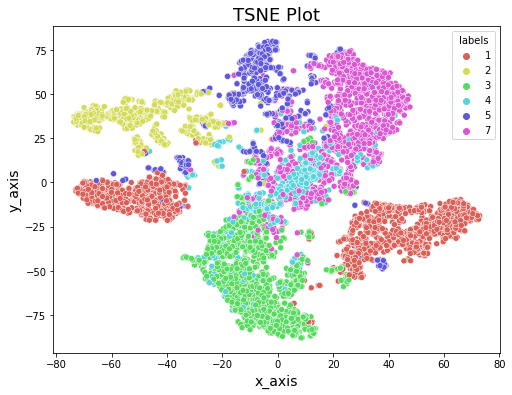

In [ ]:
df = pd.DataFrame()
df['x_axis'] = tsne_results_2D[:,0]
df['y_axis'] = tsne_results_2D[:,1]
df['labels'] = y
plt.figure(figsize=(8,6))
sn.scatterplot(
    x="x_axis", y="y_axis",
    hue="labels",
    palette=sn.color_palette("hls", 6),
    data=df,
    legend="full",
)
plt.title("TSNE Plot", size=18)
plt.xlabel("x_axis",size=14)
plt.ylabel("y_axis",size=14)

## Splitting

In [ ]:
def splitting(X,y,test_size):
    size = y.size
    train_size = int (size*(1-test_size))
    X_train = X[:train_size,:]
    X_test = X[train_size:,:]
    y_train = y[:train_size]
    y_test = y[train_size:]

    return X_train, X_test, y_train, y_test

## kNN

In [ ]:
def euclidean_dist(row1, row2):
  distance = 0.0
  for i in range(len(row1)-1):
    distance += ((row1[i] - row2[i])**2)
  return sqrt(distance)

In [ ]:
def nearest_k(X_train, y_train, X_test, neigb):
  y_pred = np.full((X_test.shape[0],len(neigb)),0,int)
  for row in range(X_test.shape[0]):
    l=[]
    
    for row1 in range(X_train.shape[0]):
      a=euclidean_dist(X_train[row1],X_test[row])
      
      l.append((y_train[row1], a))

    l.sort(key=lambda tup: tup[1])    
    j=0
    for nb in neigb:
      neighbors = []
      for i in range(nb):
        neighbors.append(l[i][0])
      
      lbl = np.array(neighbors)
      temp=stats.mode(lbl)
      y_pred[row][j] = temp[0][0]
      j+=1

  return y_pred

In [ ]:
neigb=[2,3,5,8,10]
y_pred = nearest_k(X_train, y_train, X_test, neigb)

In [ ]:
# joblib.dump(y_pred, '/content/drive/My Drive/ML_Assignment5/PredictedGrid_Q1')
y_pred = joblib.load('/content/drive/My Drive/ML_Assignment5/PredictedGrid_Q1')

In [ ]:
err_test = []
err_train = []
for i in range(5):
  err_test.append(1 - accuracy_score(y_test, y_pred[:,i]))
  err_train.append(1 - accuracy_score(y_train, y_pred_train[:,i]))

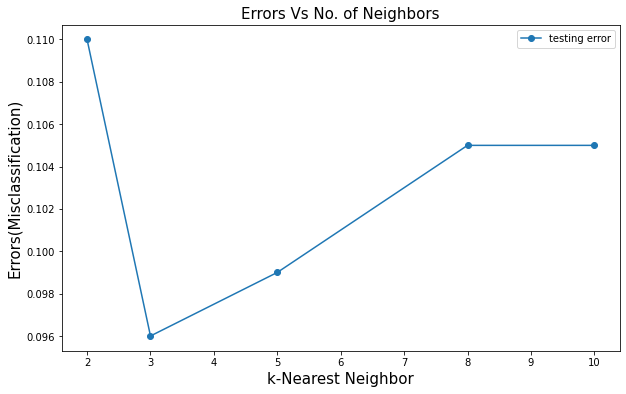

In [ ]:
neigb=[2,3,5,8,10]
plt.figure(figsize=[10,6])
plt.xlabel('k-Nearest Neighbor',fontsize=15)
plt.ylabel('Errors(Misclassification)',fontsize=15)
plt.title('Errors Vs No. of Neighbors',fontsize=15)
plt.plot(neigb,err_test,label='testing error',marker='o')
# plt.plot(neigb,err_train,label='training error',marker='v')
plt.legend()
plt.show()

## Inbuilt kNN

In [ ]:
neigb=[2,3,5,8,10]
y_pred_train = nearest_k(X_train, y_train, X_train, neigb)

In [ ]:
# joblib.dump(y_pred_train, '/content/drive/My Drive/ML_Assignment5/PredictedGrid_Q1_train')
y_pred_train = joblib.load('/content/drive/My Drive/ML_Assignment5/PredictedGrid_Q1_train')

In [ ]:
print('\033[1m'+'Optimal value for k is {1:d}\nTraining Accuracy for optimal value of neighbors(using code) is {0:.3f}\nTesting Accuracy for optimal value of neighbors(using code) is {2:.3f}'.format(accuracy_score(y_train, y_pred_train[:,1]),neigb[1],accuracy_score(y_test, y_pred[:,1])))

Optimal value for k is 3
Training Accuracy for optimal value of neighbors(using code) is 0.952
Testing Accuracy for optimal value of neighbors(using code) is 0.904


In [ ]:
neigb=[2,3,5,8,10]
model = kNN(n_neighbors=3)
model.fit(X_train,y_train)
y_pred1 = model.predict(X_test)
y_pred1_train = model.predict(X_train)
print('\033[1m'+'Optimal value for k is {1:d}\nTraining Accuracy for optimal value of neighbors(using inbuilt) is {0:.3f}\nTesting Accuracy for optimal value of neighbors(using inbuilt) is {2:.3f}'.format(accuracy_score(y_train, y_pred1_train),neigb[1],accuracy_score(y_test, y_pred1)))

Optimal value for k is 3
Training Accuracy for optimal value of neighbors(using inbuilt) is 0.953
Testing Accuracy for optimal value of neighbors(using inbuilt) is 0.903


# Question 2

In [ ]:
import h5py
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import log_loss 
from sklearn.decomposition import PCA

In [ ]:
filename = "/content/drive/MyDrive/ML_Assignment5/MNIST_Subset.h5"
h5 = h5py.File(filename,'r')

In [ ]:
h5.keys()

<KeysViewHDF5 ['X', 'Y']>

In [ ]:
S=h5['X']
L=h5['Y']

In [ ]:
S=np.array(S)
L=np.array(L)

In [ ]:
def plot_images(samples, labels):
  k=7
  while(k<10):
      i=0
      j=0
      f = plt.figure(figsize=(10,10))

      while(i < 10):
          if(labels[j] == k):
              plt.subplot(k+1, 10, i+1)    
              plt.imshow(samples[j])
              plt.axis('off')
              i+=1
          j+=1
      plt.title('Class:'+str(k))
      plt.show()
      k+=2

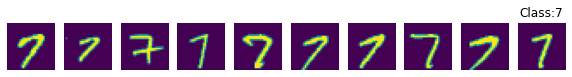

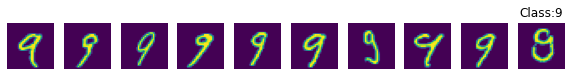

In [ ]:
plot_images(S, L)

## 1) Split 

In [ ]:
S = S.reshape(S.shape[0],(S.shape[1] * S.shape[2]))

In [ ]:
S_train, S_test, L_train, L_test = train_test_split(S, L, test_size=0.2, random_state=42)
L_test1 = np.array(L_test)

## 2) NN from sklearn

In [ ]:
clf = MLPClassifier(activation='logistic', hidden_layer_sizes=(100, 50, 50), random_state=1)

In [ ]:
clf.fit(S_train, L_train)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100, 50, 50), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [ ]:
y_pred = clf.predict(S_test)
print('Testing Accuracy on default parameters = {0:.2f}%'.format(accuracy_score(L_test1, y_pred)*100))
y_pred1 = clf.predict_proba(S_test)[:,1]
L_test[L_test[:] == 7] = 0
L_test[L_test[:] == 9] = 1
y_pred[y_pred[:] == 7] = 0
y_pred[y_pred[:] == 9] = 1
testing_loss = log_loss(L_test,y_pred1)
print('Testing Loss on default parameters = {0:.4f}'.format(testing_loss))
y_pred_train = clf.predict(S_train)
print('Training Accuracy on default parameters = {0:.2f}%'.format(accuracy_score(L_train, y_pred_train)*100))
print('Training Loss on default parameters = {0:.4f}'.format(clf.loss_))

Testing Accuracy on default parameters = 98.00%
Testing Loss on default parameters = 0.0618
Training Accuracy on default parameters = 98.68%
Training Loss on default parameters = 0.0451


In [ ]:
cv = clf.loss_curve_

Text(0.5, 1.0, 'Loss Curve')

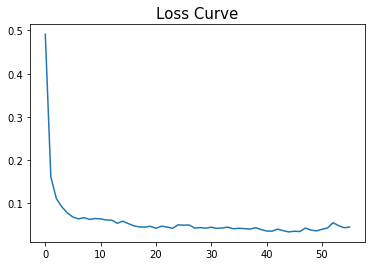

In [ ]:
plt.plot(cv)
plt.title('Loss Curve', fontsize=15)

## 3) Decision Boundaries

In [ ]:
alpha = [1e4, 1e-4, 1]
for i in alpha:
  clf = MLPClassifier(alpha = i, activation='logistic', hidden_layer_sizes=(100, 50, 50), random_state=1)
  clf.fit(S_train, L_train)
  L_pred = clf.predict(S_test)
  print('Accuracy at alpha = {0:.4f} is {1:.2f}%'.format(i,accuracy_score(L_test, L_pred)*100))

Accuracy at alpha = 10000.0000 is 51.21%
Accuracy at alpha = 0.0001 is 98.00%
Accuracy at alpha = 1.0000 is 98.07%


In [ ]:
def plots(model, X, y, cl, title):
  cMap = cma.ListedColormap(["cyan", cl])
  cMapa = cma.ListedColormap([cl, "cyan"])
  x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
  y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
  h = .2  # step size in the mesh
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
  Z = model.predict(np.column_stack((xx.ravel(), yy.ravel())))
  Z = Z.reshape(xx.shape)
  ax = plt.figure(figsize=(8, 6)).gca() #, frameon=True)
  plt.title(title, fontsize=15)
  plt.axis('off')
  plt.pcolormesh(xx, yy, Z, cmap=cMap)
  sctr = ax.scatter(X[:, 0], X[:, 1], c=y, marker = "o", edgecolors='k', cmap=cMapa)
  plt.legend(handles=sctr.legend_elements()[0],labels=np.unique(y).tolist(),title='Classes')
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())
  plt.show()

In [ ]:
tsne = TSNE(n_components=2)
tsne_results_2D = tsne.fit_transform(S_train)

In [ ]:
# joblib.dump(tsne_results_2D, '/content/drive/My Drive/ML_Assignment5/TSNE_Q2')
tsne_results_2D = joblib.load('/content/drive/My Drive/ML_Assignment5/TSNE_Q2')

Text(0, 0.5, 'y_axis')

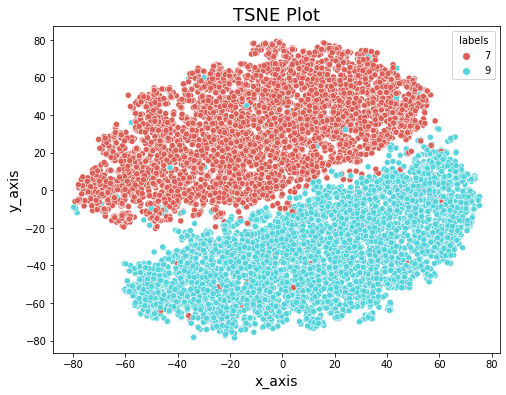

In [ ]:
df = pd.DataFrame()
df['x_axis'] = tsne_results_2D[:,0]
df['y_axis'] = tsne_results_2D[:,1]
df['labels'] = L_train
plt.figure(figsize=(8,6))
sn.scatterplot(
    x="x_axis", y="y_axis",
    hue="labels",
    palette=sn.color_palette("hls", 2),
    data=df,
    legend="full",
)
plt.title("TSNE Plot", size=18)
plt.xlabel("x_axis",size=14)
plt.ylabel("y_axis",size=14)

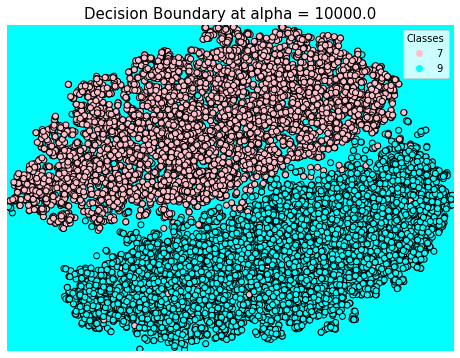

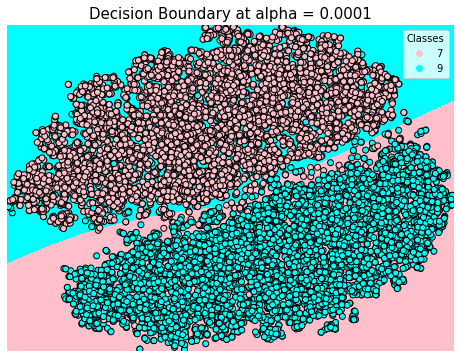

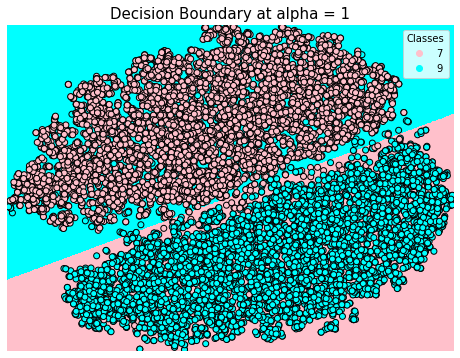

In [ ]:
alpha = [1e4, 1e-4, 1]
for i in alpha:
  clf = MLPClassifier(alpha = i, activation='logistic', hidden_layer_sizes=(100, 50, 50), random_state=1)
  clf.fit(tsne_results_2D, L_train)
  plots(clf, tsne_results_2D, L_train, "pink", 'Decision Boundary at alpha = '+str(i))
  print("\n\n\n")